In [75]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [88]:
folder='../datasets'
filename='wn_2019-07-14 10:05:17.988850.csv'

In [89]:
import csv

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(float(x))
            except ValueError:
                pass
print(time_series)

[0.0, 3.0, 1.0, -2.0, 0.0, 2.0, 1.0, 2.0, -3.0, 3.0, -4.0, 1.0, 2.0, -5.0, 4.0, 5.0, -2.0, 2.0, 3.0, 0.0, 3.0, -1.0, 1.0, -4.0, -2.0, -3.0, 4.0, 5.0, -2.0, 3.0, 5.0, 0.0, 5.0, 5.0, 0.0, -1.0, 0.0, -3.0, 1.0, -1.0, 2.0, -3.0, 4.0, 4.0, -1.0, 0.0, -2.0, -1.0, -3.0, 0.0, 5.0, -5.0, -1.0, 1.0, -2.0, -1.0, 5.0, 1.0, 3.0, -2.0, 1.0, -4.0, 1.0, 1.0, 4.0, -4.0, 3.0, -4.0, 1.0, -3.0, -4.0, -1.0, -2.0, -3.0, -4.0, -3.0, 3.0, 5.0, 0.0, -2.0, -1.0, 1.0, 0.0, 2.0, 5.0, -4.0, -4.0, -2.0, -2.0, 0.0, -3.0, 0.0, 2.0, 0.0, 3.0, -4.0, 2.0, -3.0, -2.0, -5.0, 5.0, -3.0, 0.0, -5.0, 2.0, 5.0, -3.0, -1.0, 2.0, 4.0, -5.0, 2.0, -3.0, -3.0, -4.0, 0.0, 3.0, 4.0, 1.0, 2.0, -3.0, 0.0, -5.0, -2.0, 4.0, 1.0, 3.0, 4.0, 3.0, 5.0, -3.0, 3.0, -4.0, 5.0, -3.0, 5.0, -4.0, -3.0, 3.0, -5.0, -5.0, -5.0, -2.0, 0.0, 1.0, 2.0, -1.0, -4.0, -4.0, -5.0, 3.0, -5.0, -1.0, -3.0, 3.0, 4.0, 1.0, 0.0, -3.0, 1.0, 1.0, -4.0, 0.0, 4.0, -1.0, 4.0, 4.0, 1.0, -3.0, 3.0, 3.0, -1.0, 2.0, 5.0, -2.0, 3.0, 2.0, 2.0, 2.0, -3.0, -1.0, 3.0, -4.0, 4.0,

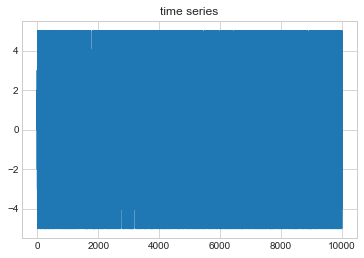

In [90]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

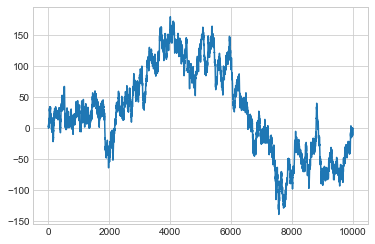

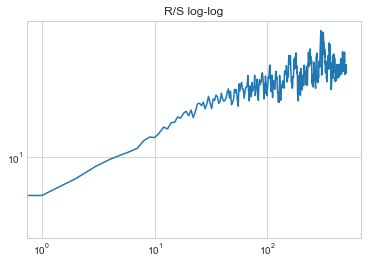

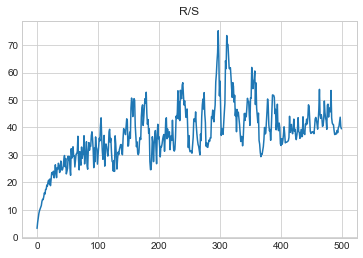

In [91]:
from math import sqrt
from scipy import stats

def Xt(time_series):
    mean = 1.0*sum(time_series)/len(time_series)
    _Yt = [x - mean for x in time_series]
    return np.cumsum(_Yt).tolist()

def calc_b(x, y, slope):
    return y - slope * x 

def Yt(Xt, n):
    rc = []
    
    for i in range(0, int(len(Xt)/n)*n, n):
        slope, intercept, r_value, p_value, std_err = stats.linregress( range(n), Xt[i:i+n])
        rc.append(slope)
        b = calc_b(i, Xt[i], slope)
        
        #plt.plot(range(i, i+n), [slope*x +b for x in range(i, i+n)], color="red")
        #plt.plot(range(i, i+n), [Xt[x] for x in range(i, i+n)], color="green")

    #plt.show()
    return rc



def Fn(Xt, n): 
    rc = []
    
    Yt_ = Yt(Xt, n)
    s = 0
    pos = 0
    internal_pos = 0
    b = calc_b(Yt_[s], 0, Xt[0])
    
    for t in range (1, int(len(Xt)/n)*n+1):
        yn = (t - 1) * Yt_[s] + b
        rc.append((Xt[t - 1] - yn)**2)
        if (t % n) == 0:
            s += 1
            if s >= len(Yt_):
                break
            b = calc_b(t, Xt[t], Yt_[s])
            
    return sqrt(1.0 * sum(rc) / len(rc))

Xt_ = Xt(time_series)

plt.plot(Xt_)
plt.show()
rs = []


for n in range(8, int(len(Xt_)/2), 10):
    rs.append(Fn(Xt_, n))


#print(f"rs={rs}")
plt.plot(rs)
plt.xscale("log")
plt.yscale("log")
plt.title("R/S log-log")
plt.show()

plt.plot(rs)
plt.title("R/S")
plt.show()

In [92]:
from math import log

slope, intercept, r_value, p_value, std_err = stats.linregress( [log(x, 10) for x in range(1,len(rs)+1)], [log(x, 10) for x in rs])
print(f"DFA:{slope},p_value={p_value},std_err={std_err}")


DFA:0.2806074511716483,p_value=3.097604191345222e-123,std_err=0.008748758110376363
